In [25]:
# 導入函式庫以及讀取資料
import pandas as pd


df = pd.read_csv("water_potability.csv")

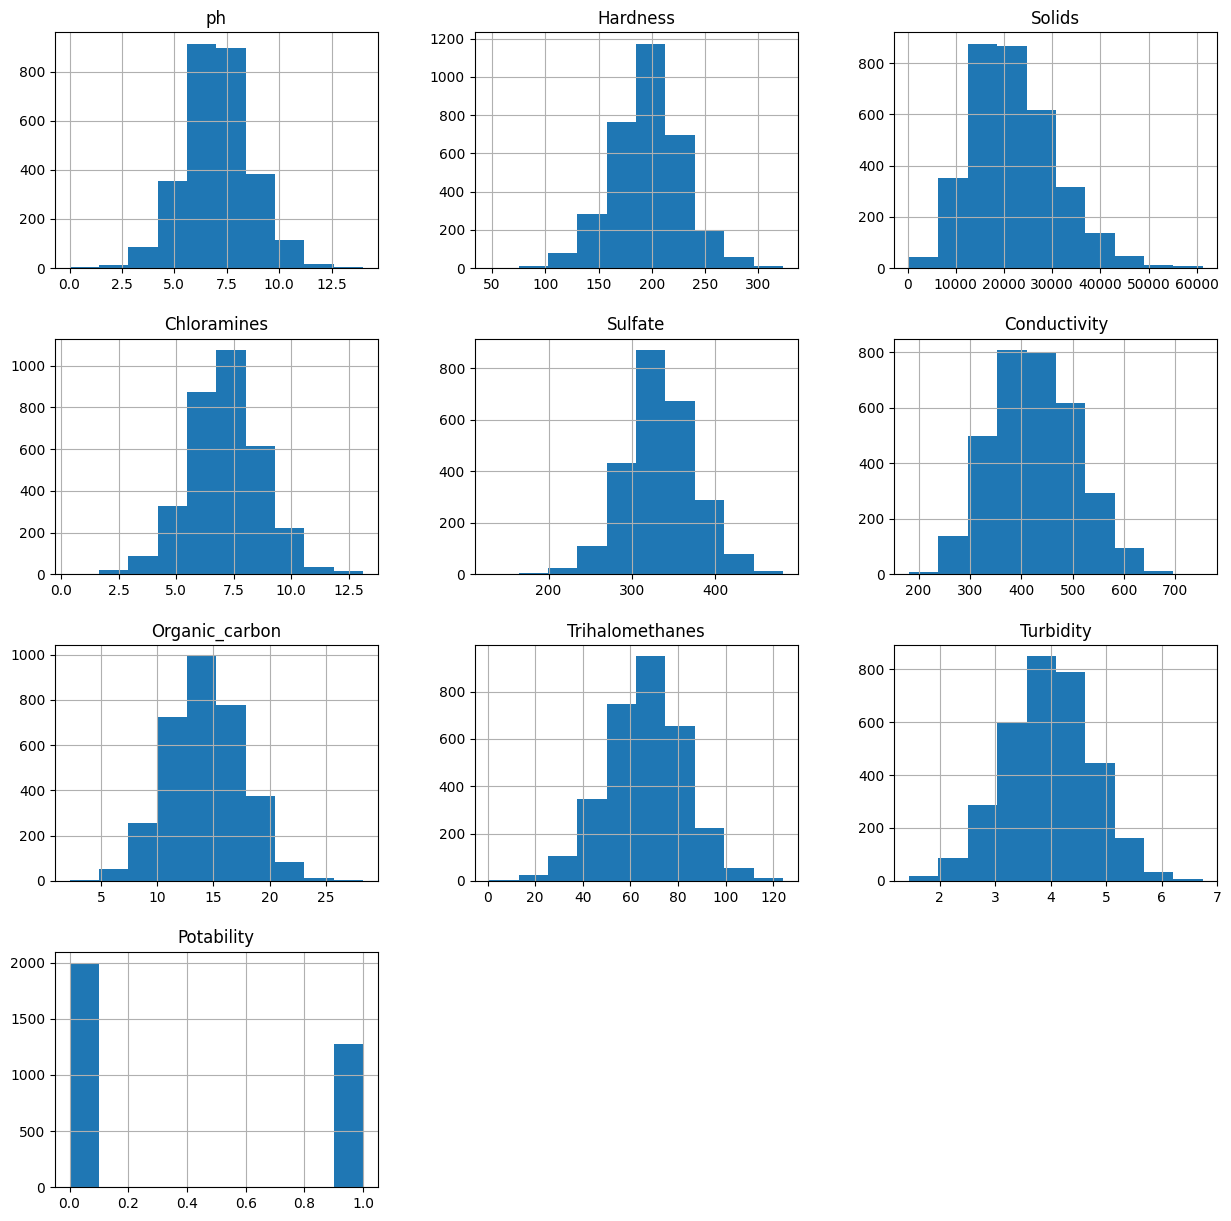

In [26]:
# 特徵分布分析
from matplotlib import pyplot as plt


df.hist(figsize=(15, 15))
plt.show()

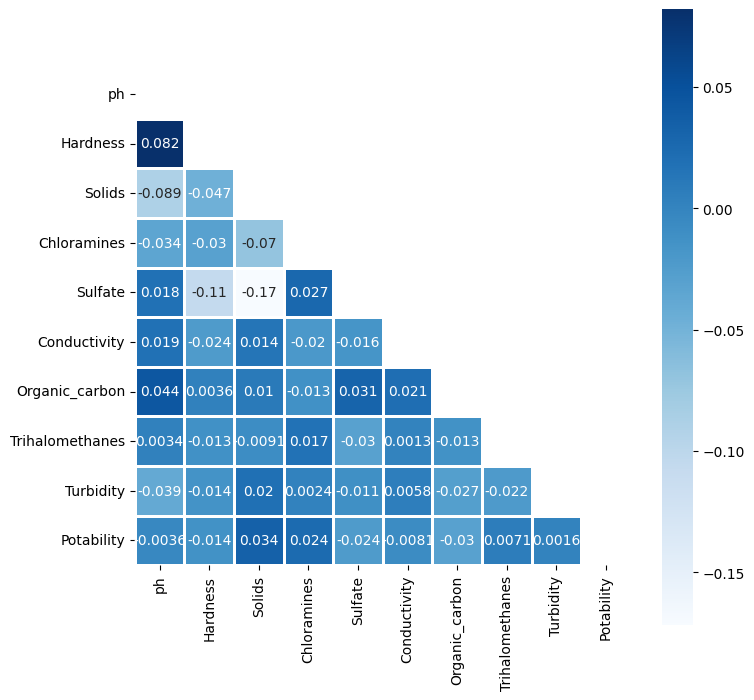

In [27]:
# 分析特徵相依性
# 正數為有正關聯，負數則為負關聯
import numpy as np
import seaborn as sns

plt.figure(figsize=(8, 8))
corrMask = np.triu(df.corr())
sns.heatmap(
    df.corr(),
    linewidths=1,
    annot=True,
    square=True,
    mask=corrMask,
    cmap="Blues",
)
plt.show()

In [28]:
# 填補空缺值
empty = df.columns[df.isna().any()].tolist()
print("有空缺的資料：", empty)
print("填補空缺值...")
for i in empty:
    df[i].fillna(value=df[i].median(), inplace=True)
print("確認填補結果：")
df.isnull().sum()

有空缺的資料： ['ph', 'Sulfate', 'Trihalomethanes']
填補空缺值...
確認填補結果：


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [29]:
# 切分特徵和目標變量
from sklearn.model_selection import train_test_split


X = df.drop("Potability", axis=1)
y = df["Potability"]
# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

{'max_depth': 3, 'max_features': 1}
0.6324704474038605
模型準確率：0.61
DecisionTree Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.93      0.74      1487
           1       0.52      0.12      0.19       970

    accuracy                           0.61      2457
   macro avg       0.57      0.52      0.47      2457
weighted avg       0.58      0.61      0.52      2457



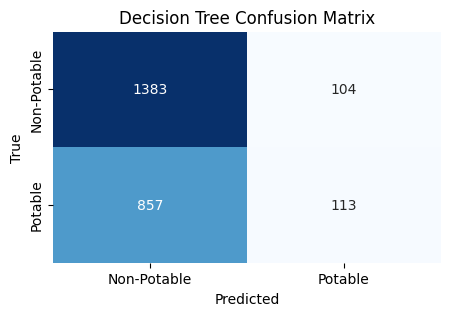

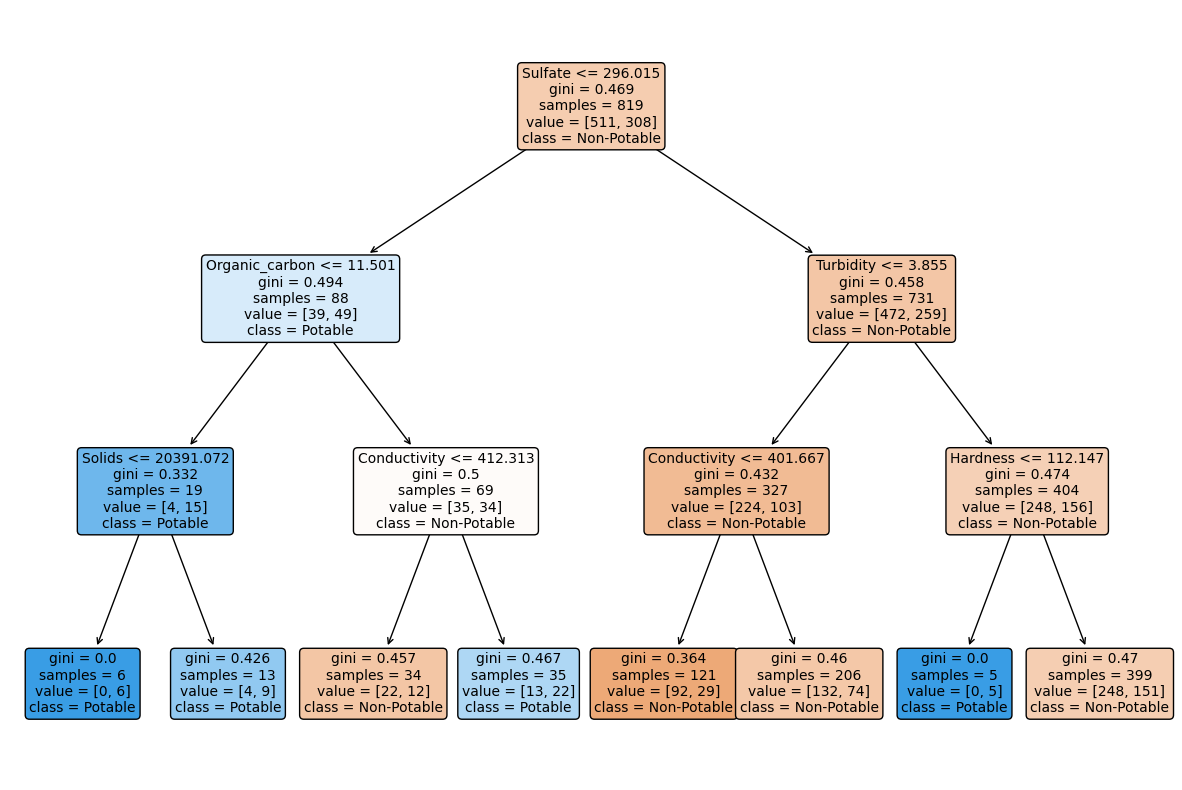

Cross-Validation Scores: [0.63262195 0.60763359 0.61068702 0.60763359 0.58473282]
Mean Accuracy: 0.61


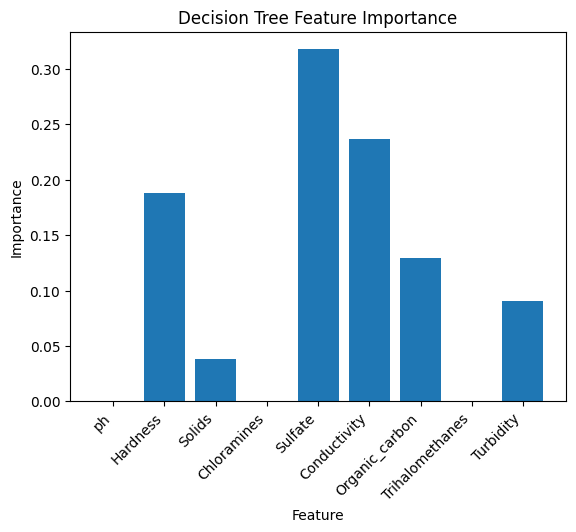

In [30]:
# 決策樹
# 對水質數據進行分類
"""
在機器學習中，超參數是在模型擬合之前需要手動設定的參數，而不是由模型自動學習的參數。
決策樹有一些超參數，例如樹的深度 (max_depth) 和每個節點最大特徵數 (max_features) 等，這些超參數的設定會影響模型的性能。
通常情況下，我們不知道哪組超參數值是最佳的，因此我們使用網格搜索來通過在指定的超參數範圍內嘗試不同的組合，從而找到最佳的超參數組合。
這樣做的好處是，可以自動化地找到最佳超參數，而不需要手動進行不斷的調整。這有助於提高模型的性能，使其更能適應數據並提高預測能力。
"""
"""
這裡使用網格搜索 (GridSearchCV) 來尋找最佳的 K 值。
定義了一個 K 值的範圍（1 到 101），然後使用網格搜索在這個範圍內尋找最佳的 K 值。
GridSearchCV 通過交叉驗證（cv=5）來評估每個 K 值的性能。
最後，印出最佳的 K 值和對應的交叉驗證分數。
"""

# 定義決策樹模型的超參數範圍
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


gridSearchParam = {
    "max_depth": [3],
    "max_features": [i for i in range(1, len(X.columns) + 1)],
}

# 使用網格搜索(GridSearchCV)尋找最佳超參數
gridSearch = GridSearchCV(DecisionTreeClassifier(), gridSearchParam, cv=5)
gridSearch.fit(X_train, y_train)
print(gridSearch.best_params_)  # 輸出最佳超參數
print(gridSearch.best_score_)  # 輸出最佳模型的交叉驗證分數
best_param = gridSearch.best_params_

# 建立決策樹模型
dt = DecisionTreeClassifier(max_depth=3, max_features=best_param["max_features"])
dt.fit(X_train, y_train)

# 進行預測
dtPredict = dt.predict(X_test)

# 評估模型性能

dtAccuracy = accuracy_score(y_test, dtPredict)
print(f"模型準確率：{dtAccuracy:.2f}")

# 分類報告
print("DecisionTree Classification Report: ")
print(classification_report(y_test, dtPredict))

# 混淆矩陣
# 使用Seaborn來繪製熱力圖
plt.figure(figsize=(5, 3))
sns.heatmap(
    confusion_matrix(y_test, dtPredict),
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Non-Potable", "Potable"],
    yticklabels=["Non-Potable", "Potable"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# 可視化決策樹
plt.figure(figsize=(15, 10))
plot_tree(
    dt,
    feature_names=X.columns.tolist(),
    class_names=["Non-Potable", "Potable"],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.show()

# 交叉驗證，評估模型的穩健性
crossVal = cross_val_score(dt, X, y, cv=5)
print(f"Cross-Validation Scores: {crossVal}")
print(f"Mean Accuracy: {crossVal.mean():.2f}")

plt.bar(X.columns, dt.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.title("Decision Tree Feature Importance")
plt.show()

模型準確率：0.64
分類報告:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      1487
           1       0.59      0.28      0.38       970

    accuracy                           0.64      2457
   macro avg       0.62      0.58      0.56      2457
weighted avg       0.63      0.64      0.60      2457



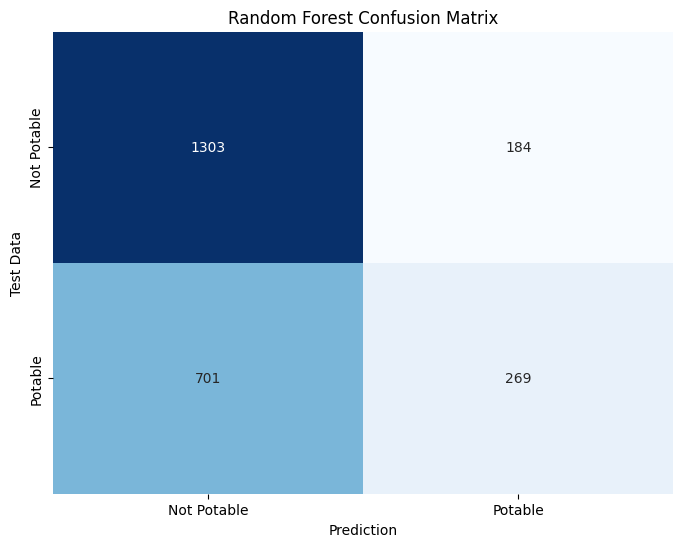

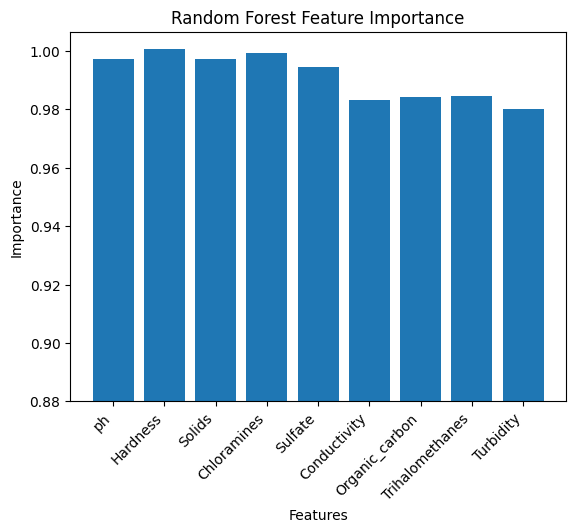

Cross-Validation Scores: [0.61737805 0.65496183 0.64580153 0.59541985 0.69007634]
Mean Accuracy: 0.64


In [38]:
# RandomForest
# 創建一個隨機森林分類器
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf.fit(X_train, y_train)

# 使用測試集進行預測
rfPredict = rf.predict(X_test)

# 評估模型準確率
rfAccuracy = accuracy_score(y_test, rfPredict)
print(f"模型準確率：{rfAccuracy:.2f}")

# 列印分類報告
print("分類報告:")
print(classification_report(y_test, rfPredict))

# 混淆矩陣
# 顯示混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, rfPredict),
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Not Potable", "Potable"],
    yticklabels=["Not Potable", "Potable"],
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Test Data")
plt.show()


plt.bar(X.columns, rf.feature_importances_)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()


# 交叉驗證，評估模型的穩健性
crossVal = cross_val_score(rf, X, y, cv=5)
print(f"Cross-Validation Scores: {crossVal}")
print(f"Mean Accuracy: {crossVal.mean():.2f}")

模型準確率：0.60
分類報告:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75      1487
           1       0.49      0.04      0.07       970

    accuracy                           0.60      2457
   macro avg       0.55      0.51      0.41      2457
weighted avg       0.56      0.60      0.48      2457



C:\Users\paul1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


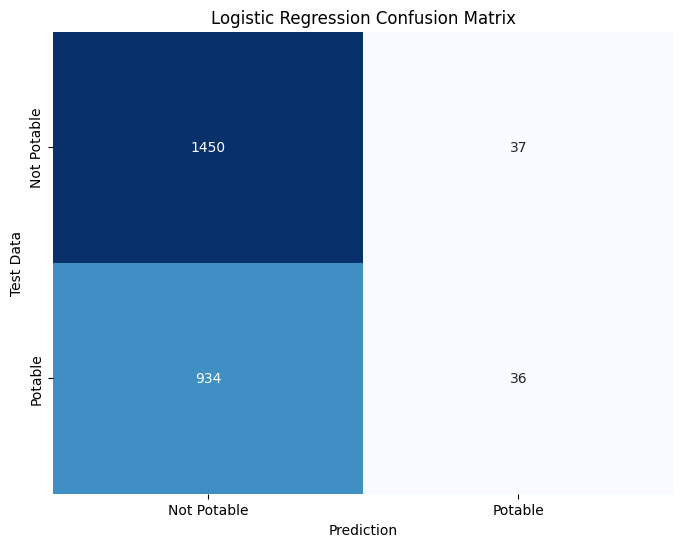

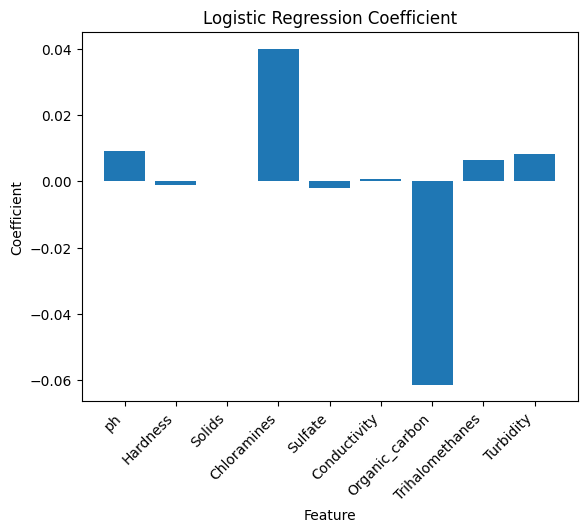

Cross-Validation Scores: [0.6097561  0.61068702 0.61068702 0.60916031 0.60916031]
Mean Accuracy: 0.61


In [32]:
# 邏輯回歸
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train, y_train)
lrPredict = lr.predict(X_test)

# 評估模型準確率
lrAccuracy = accuracy_score(y_test, lrPredict)
print(f"模型準確率：{lrAccuracy:.2f}")

print("分類報告:")
print(classification_report(y_test, lrPredict))

plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, lrPredict),
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Not Potable", "Potable"],
    yticklabels=["Not Potable", "Potable"],
)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Test Data")
plt.show()

plt.bar(X.columns, lr.coef_[0])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Logistic Regression Coefficient")
plt.show()


# 交叉驗證，評估模型的穩健性
crossVal = cross_val_score(lr, X, y, cv=5)
print(f"Cross-Validation Scores: {crossVal}")
print(f"Mean Accuracy: {crossVal.mean():.2f}")

模型準確率：0.61
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1487
           1       0.51      0.29      0.37       970

    accuracy                           0.61      2457
   macro avg       0.58      0.56      0.55      2457
weighted avg       0.59      0.61      0.58      2457



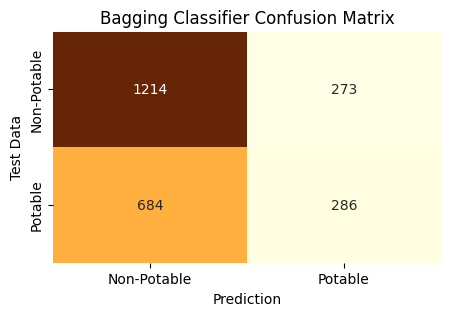


Cross-Validation Scores: [0.59908537 0.60305344 0.62900763 0.57099237 0.63664122]
Mean Accuracy: 0.61


In [33]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier


bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
baggingPredict = bagging.predict(X_test)


baggingAccuracy = accuracy_score(y_test, baggingPredict)
print(f"模型準確率：{baggingAccuracy:.2f}")
print("KNN Classification Report:")
print(classification_report(y_test, baggingPredict))

# 使用Seaborn來繪製混淆矩陣
plt.figure(figsize=(5, 3))
sns.heatmap(
    confusion_matrix(y_test, baggingPredict),
    annot=True,
    fmt="d",
    cmap="YlOrBr",
    cbar=False,
    xticklabels=["Non-Potable", "Potable"],
    yticklabels=["Non-Potable", "Potable"],
)
plt.xlabel("Prediction")
plt.ylabel("Test Data")
plt.title("Bagging Classifier Confusion Matrix")
plt.show()

# 交叉驗證
crossVal = cross_val_score(bagging, X, y, cv=5)
print(f"\nCross-Validation Scores: {crossVal}")
print(f"Mean Accuracy: {crossVal.mean():.2f}")

{'n_neighbors': 6}
0.6349319168038307
模型準確率：0.62
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.91      0.74      1487
           1       0.56      0.19      0.28       970

    accuracy                           0.62      2457
   macro avg       0.60      0.55      0.51      2457
weighted avg       0.60      0.62      0.56      2457



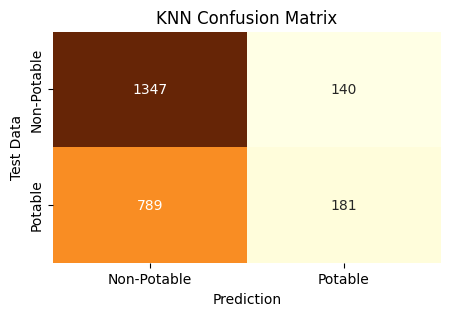


Cross-Validation Scores: [0.58689024 0.56030534 0.58778626 0.59541985 0.56946565]
Mean Accuracy: 0.58


In [34]:
# KNN

# 特徵標準化
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

"""
這裡使用網格搜索 (GridSearchCV) 來尋找最佳的 K 值。
定義了一個 K 值的範圍（1 到 21），然後使用網格搜索在這個範圍內尋找最佳的 K 值。
GridSearchCV 通過交叉驗證（cv=5）來評估每個 K 值的性能。
最後，印出最佳的 K 值和對應的交叉驗證分數。
"""

# 定義決策樹模型的超參數範圍
gridSearchParam = {"n_neighbors": range(1, 21)}

# 使用網格搜索尋找最佳K值
gridSearch = GridSearchCV(KNeighborsClassifier(), gridSearchParam, cv=5)
gridSearch.fit(X_train_scaled, y_train)
print(gridSearch.best_params_)
print(gridSearch.best_score_)
best_param = gridSearch.best_params_["n_neighbors"]

# 使用最佳K值擬合新的KNN模型
knn = KNeighborsClassifier(n_neighbors=best_param)
knn.fit(X_train_scaled, y_train)

# 預測
knnPredict = knn.predict(X_test_scaled)

# 評估模型性能 分類報告

knnAccuracy = accuracy_score(y_test, knnPredict)
print(f"模型準確率：{knnAccuracy:.2f}")
print("KNN Classification Report:")
print(classification_report(y_test, knnPredict))

# 使用Seaborn來繪製混淆矩陣
plt.figure(figsize=(5, 3))
sns.heatmap(
    confusion_matrix(y_test, knnPredict),
    annot=True,
    fmt="d",
    cmap="YlOrBr",
    cbar=False,
    xticklabels=["Non-Potable", "Potable"],
    yticklabels=["Non-Potable", "Potable"],
)
plt.xlabel("Prediction")
plt.ylabel("Test Data")
plt.title("KNN Confusion Matrix")
plt.show()

# 交叉驗證
crossVal = cross_val_score(knn, X, y, cv=5)
print(f"\nCross-Validation Scores: {crossVal}")
print(f"Mean Accuracy: {crossVal.mean():.2f}")

模型準確率：0.66
分類報告：
              precision    recall  f1-score   support

           0       0.65      0.94      0.77      1487
           1       0.70      0.23      0.34       970

    accuracy                           0.66      2457
   macro avg       0.68      0.58      0.56      2457
weighted avg       0.67      0.66      0.60      2457



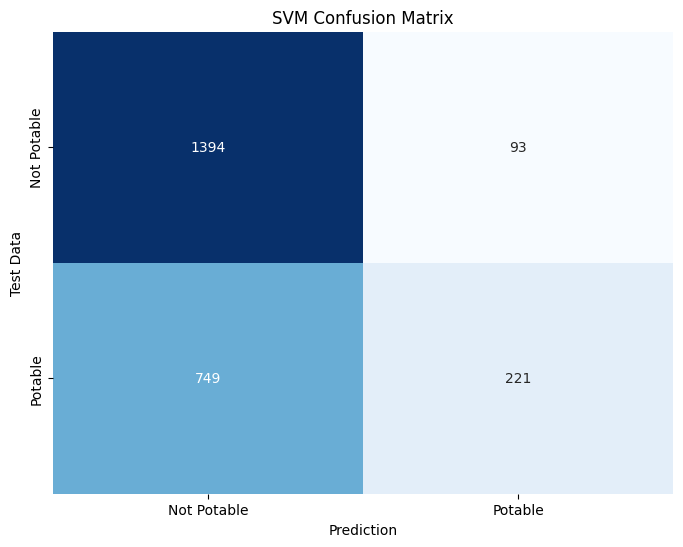

Cross-Validation Scores: [0.6097561  0.61068702 0.61068702 0.60916031 0.60916031]
Mean Accuracy: 0.61


In [35]:
# SVM
# 初始化 SVM 分類器
from sklearn.svm import SVC


svm = SVC()

# 訓練 SVM 模型
svm.fit(X_train_scaled, y_train)

# 使用測試集進行預測
svmPredict = svm.predict(X_test_scaled)

# 評估模型準確率
svmAccuracy = accuracy_score(y_test, svmPredict)
print(f"模型準確率：{svmAccuracy:.2f}")

# 顯示分類報告
print("分類報告：")
print(classification_report(y_test, svmPredict))

# 混淆矩陣

# 顯示混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, svmPredict),
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Not Potable", "Potable"],
    yticklabels=["Not Potable", "Potable"],
)
plt.title("SVM Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Test Data")
plt.show()
"""
# 顯示特徵重要性
plt.bar(X.columns, svm.coef_[0])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("SVM Coefficient")
plt.show()
"""

# 交叉驗證，評估模型的穩健性
crossVal = cross_val_score(svm, X, y, cv=5)
print(f"Cross-Validation Scores: {crossVal}")
print(f"Mean Accuracy: {crossVal.mean():.2f}")

In [36]:
scores = pd.DataFrame(
    {
        "models": [
            "Logistic Regression",
            "Decision Tree",
            "Random Forest",
            "KNN",
            "SVM",
            "Bagging Classifier",
        ],
        "accuracy": [
            lrAccuracy,
            dtAccuracy,
            rfAccuracy,
            knnAccuracy,
            svmAccuracy,
            baggingAccuracy,
        ],
    }
)
scores.sort_values(by=["accuracy"]).style.background_gradient(subset=["accuracy"])

,models,accuracy
0,Logistic Regression,0.604803
1,Decision Tree,0.608873
5,Bagging Classifier,0.610501
3,KNN,0.621897
2,Random Forest,0.639805
4,SVM,0.657306
